# Brownian Motion (Wiener Process)

In [30]:
import math
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Application in General

Assumptions:
- W(t) has continous path
- W(t) has independant increments
- W(t) has Gaussian increments, normally distrubuted with a mean of 0 and variance of dt

$$W(t+dt) - W(t) ~ N(0,dt)$$

In [74]:
def brownian_motion(dt=0.1, xO=0, N=1000):
    
    #initialise W(t) with zeros
    W = np.zeros(N+1)
    
    #create N+1 time steps: t=0,1,2,3,..,N
    t = np.linspace(0,N,N+1)
    
    # Has a mean of zero and std of dt .... N(0,dt)
    W[1:N+1] = np.cumsum(np.random.normal(0,1,N))*np.sqrt(dt)
    
    return t, W

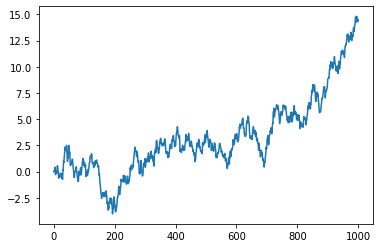

In [76]:
t, W = brownian_motion()
plt.plot(t,W)

### Application to a stock

A typical model used for stock price dynamics is the following stochastic differential equation:
$$dS = \mu S dt + \sigma S dW_t$$

Hence the closed form solution:
$$S(t)=S_0\exp^{(\mu-0.5\sigma^2)t+\sigma W_t}$$

In [26]:
def get_data(stock, start, end):
    
    key = '*'
    
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={stock}&apikey={key}&outputsize=full"
    
    r = requests.get(url)
    r.raise_for_status()
    
    df = pd.DataFrame.from_dict(
        r.json()['Time Series (Daily)'], orient='index'
    )
    
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    df['5. adjusted close'] = df['5. adjusted close'].astype('float')
    
    return df[start:end]['5. adjusted close']

In [131]:
data = get_data('AAPL', '2019-01-01', '2019-12-31')

Actual movement of price in 2019

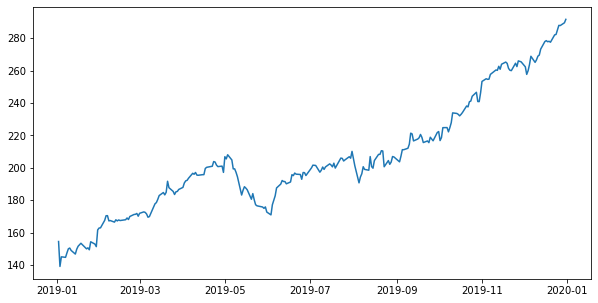

In [148]:
plt.figure(figsize=(10,5))
plt.plot(data)

Simulating the movement of the stock price using geometric brownian motion

In [126]:
returns = data.pct_change()

In [140]:
mean = returns.mean() # drift coefficient
std = returns.std() # diffusion coefficient
sO= data.iloc[0]
T=1
N=251

In [141]:
def GBM(SO, mu, sigma, W, T, N):
    t = np.linspace(0,N,N+1)
    S = []
    S.append(SO)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5*sigma**2)*t[i]
        diffusion = sigma*W[i]
        temp = SO*np.exp(drift + diffusion)
        S.append(temp)
        
    return S, t

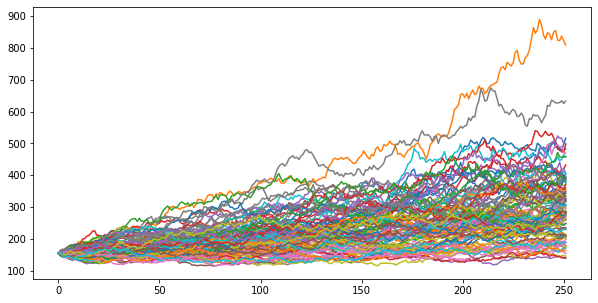

In [151]:
plt.figure(figsize=(10,5))
for i in range(100):
    t, W = brownian_motion(1, 0, N)
    S, t = GBM(sO, mean, std, W, 0, N)
    plt.plot(t, S)